LOAD DATA

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('./supermarket_sales.csv')

print("Dataset shape:", df.shape)
print(df.info())
display(df.head())

Dataset shape: (5000, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order_ID          5000 non-null   int64 
 1   Order_Date        5000 non-null   object
 2   Region            5000 non-null   object
 3   Country           5000 non-null   object
 4   Sales_Rep         5000 non-null   object
 5   Team              5000 non-null   object
 6   Customer_ID       5000 non-null   object
 7   Customer_Segment  5000 non-null   object
 8   Product_Category  5000 non-null   object
 9   Product_Name      5000 non-null   object
 10  Stage             5000 non-null   object
 11  Units_Sold        5000 non-null   int64 
 12  Revenue           5000 non-null   int64 
 13  Target            5000 non-null   int64 
 14  Deal_Size         5000 non-null   int64 
dtypes: int64(5), object(10)
memory usage: 586.1+ KB
None


,Order_ID,Order_Date,Region,Country,Sales_Rep,Team,Customer_ID,Customer_Segment,Product_Category,Product_Name,Stage,Units_Sold,Revenue,Target,Deal_Size
0,4971,2021-01-01,North,USA,David Lee,Team C,C3971,Corporate,Furniture,Office Chair,Won,6,1662,1447,1665
1,2347,2021-01-02,South,Brazil,Alice Johnson,Team B,C1347,SME,Appliances,Microwave Max,Opportunity,2,464,875,928
2,2588,2021-01-02,South,Brazil,Maria Garcia,Team C,C1588,Retail,Appliances,Refrigerator,Opportunity,5,132,277,264
3,5092,2021-01-02,East,China,Priya Sharma,Team B,C4092,Retail,Appliances,Microwave Max,Opportunity,5,610,1080,1220
4,1182,2021-01-02,North,Canada,David Lee,Team A,C0182,Retail,Electronics,Smartphone Z,Lost,0,0,854,0


Identifikasi Data Numerik

In [2]:
num_cols = df.select_dtypes(include=['float64','int64']).columns
display(df[num_cols].describe())

,Order_ID,Units_Sold,Revenue,Target,Deal_Size
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,3500.500000,2.818400,502.390000,994.572000,639.007800
std,1443.520003,2.922453,555.072392,556.665335,598.863616
min,1001.000000,0.000000,0.000000,-193.000000,0.000000
25%,2250.750000,0.000000,0.000000,567.000000,0.000000
50%,3500.500000,2.000000,347.500000,914.000000,556.000000
75%,4750.250000,5.000000,728.000000,1427.000000,1129.000000
max,6000.000000,10.000000,1999.000000,2461.000000,1999.000000


Korelasi Heatmap 

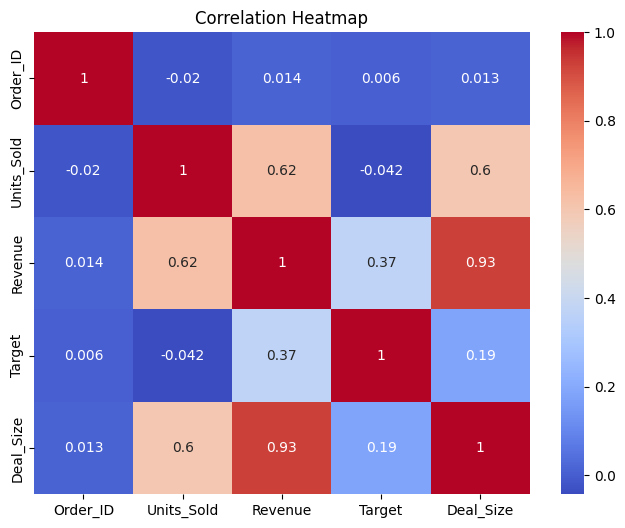

In [3]:
plt.figure(figsize=(8,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

Cek kualitas data

In [4]:
issues = {
    "Revenue == 0": len(df[df['Revenue'] == 0]),
    "Units_Sold == 0": len(df[df['Units_Sold'] == 0]),
    "Target < 0": len(df[df['Target'] < 0]),
    "Deal Size = 0": len(df[df['Deal_Size'] == 0])
}

print("\n=== DATA QUALITY ISSUES ===")
for k,v in issues.items():
    print(f"{k}: {v}")

# Focused investigation
negative_target = df[df['Target'] < 0]
zero_revenue = df[df['Revenue'] == 0]


=== DATA QUALITY ISSUES ===
Revenue == 0: 1707
Units_Sold == 0: 1707
Target < 0: 61
Deal Size = 0: 1707


Analisis Outlier

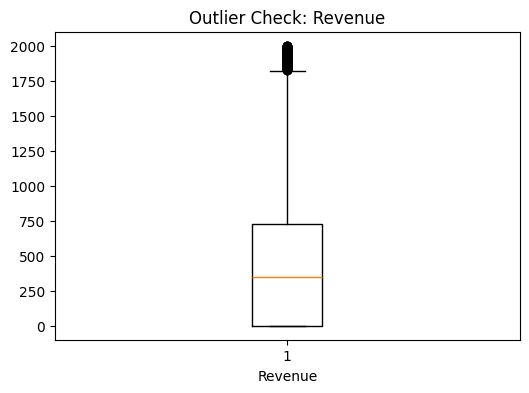

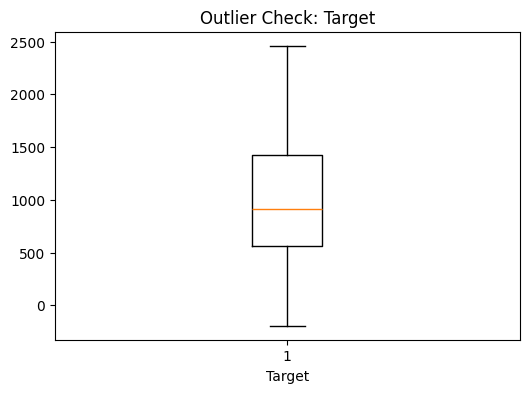

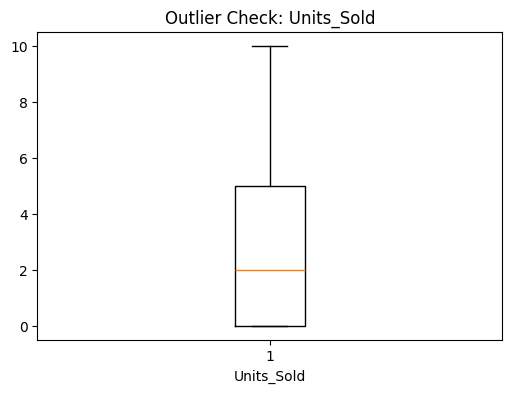

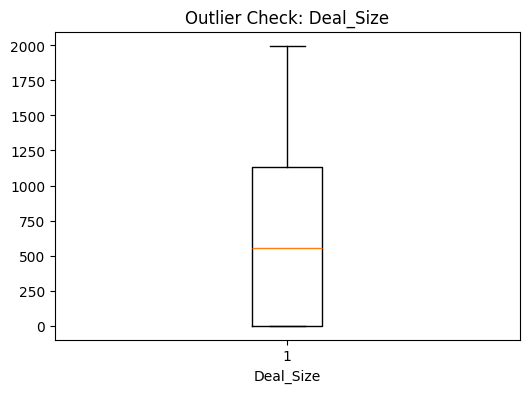

--- Outliers for Revenue ---
Outlier count: 158
     Revenue Stage Product_Category Region
11      1956   Won       Appliances  North
52      1997   Won       Appliances  North
91      1860   Won      Electronics   East
94      1955   Won        Furniture   West
110     1920   Won        Furniture  South

--- Outliers for Target ---
Outlier count: 0
Empty DataFrame
Columns: [Target, Stage, Product_Category, Region]
Index: []

--- Outliers for Units_Sold ---
Outlier count: 0
Empty DataFrame
Columns: [Units_Sold, Stage, Product_Category, Region]
Index: []

--- Outliers for Deal_Size ---
Outlier count: 0
Empty DataFrame
Columns: [Deal_Size, Stage, Product_Category, Region]
Index: []



In [5]:
import matplotlib.pyplot as plt

numeric_cols = ['Revenue','Target','Units_Sold','Deal_Size']

plt.style.use('default')

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    plt.boxplot(df[col].dropna())
    plt.title(f'Outlier Check: {col}')
    plt.xlabel(col)
    plt.show()

# Using IQR method to detect extreme outliers 
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower) | (df[col] > upper)]

    print(f"--- Outliers for {col} ---")
    print(f"Outlier count: {len(outliers)}")
    print(outliers[[col, 'Stage', 'Product_Category', 'Region']].head())
    print()


CLEANING

In [6]:
df_clean = df.copy()

# Fix negative target (set to 0)
df_clean['Target'] = df_clean['Target'].apply(lambda x: max(0, x))

# Convert date
df_clean['Order_Date'] = pd.to_datetime(df_clean['Order_Date'])

# Validation
print("\n=== CLEANING VALIDATION ===")
print("Negative Target remaining:", (df_clean['Target'] < 0).sum())
print("Order_Date dtype:", df_clean['Order_Date'].dtype)


=== CLEANING VALIDATION ===
Negative Target remaining: 0
Order_Date dtype: datetime64[ns]


VISUALISASI

Revenue Distribusi

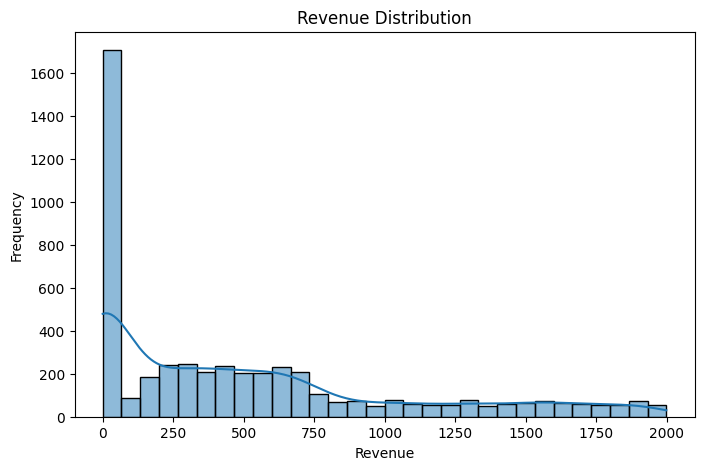

In [7]:
plt.figure(figsize=(8,5))
sns.histplot(df['Revenue'], bins=30, kde=True)
plt.title("Revenue Distribution")
plt.xlabel("Revenue")
plt.ylabel("Frequency")
plt.show()

Revenue berdasarkan region

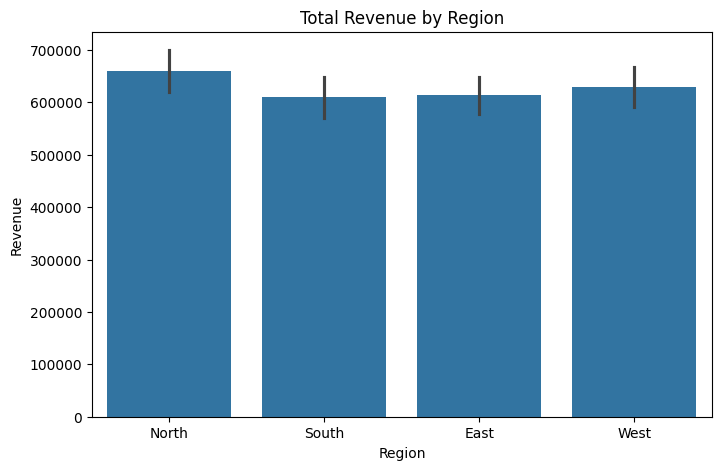

In [8]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x="Region", y="Revenue", estimator=sum)
plt.title("Total Revenue by Region")
plt.show()


Revenue berdasarkan kategori produk

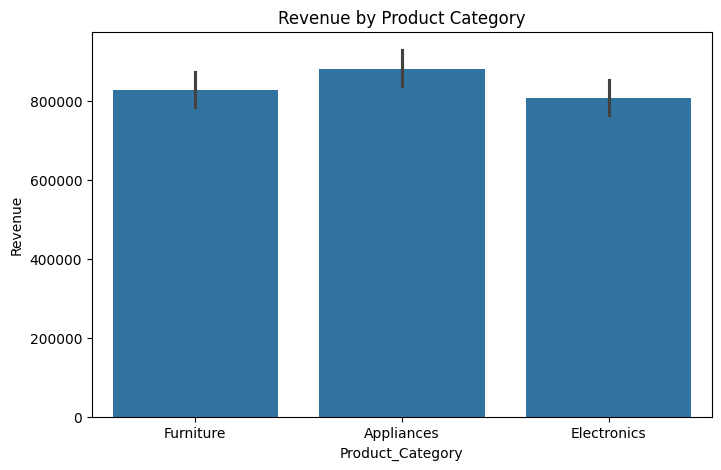

In [9]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x="Product_Category", y="Revenue", estimator=sum)
plt.title("Revenue by Product Category")
plt.show()

Top team sales

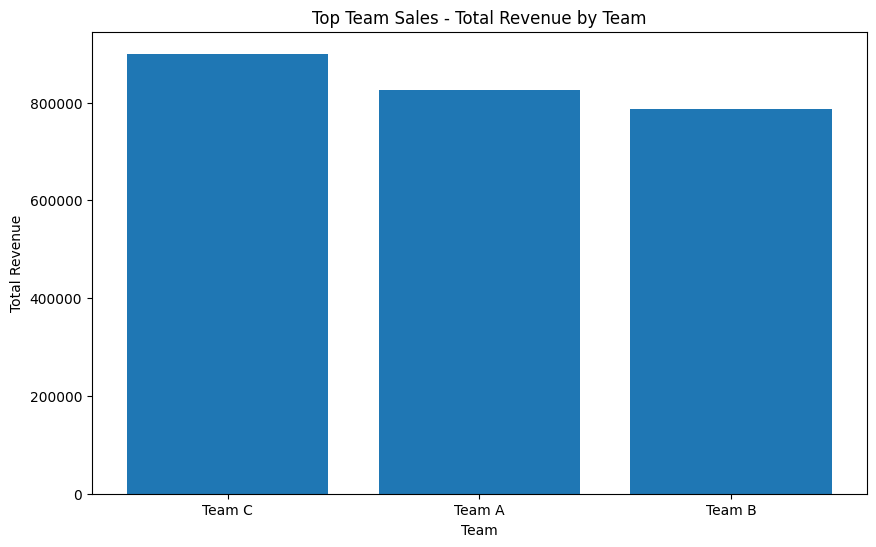

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

team_sales = df.groupby("Team")["Revenue"].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
plt.bar(team_sales.index, team_sales.values)
plt.xlabel("Team")
plt.ylabel("Total Revenue")
plt.title("Top Team Sales - Total Revenue by Team")
plt.xticks(rotation=0)
plt.show()


Revenue berdasarkan sales person

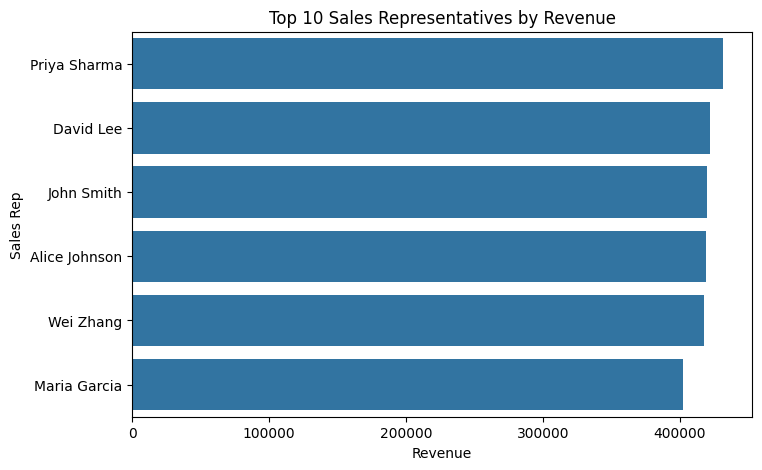

In [11]:
top_sales = df.groupby("Sales_Rep")["Revenue"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(8,5))
sns.barplot(x=top_sales.values, y=top_sales.index)
plt.title("Top 10 Sales Representatives by Revenue")
plt.xlabel("Revenue")
plt.ylabel("Sales Rep")
plt.show()

Revenue berdasarkan customer segment

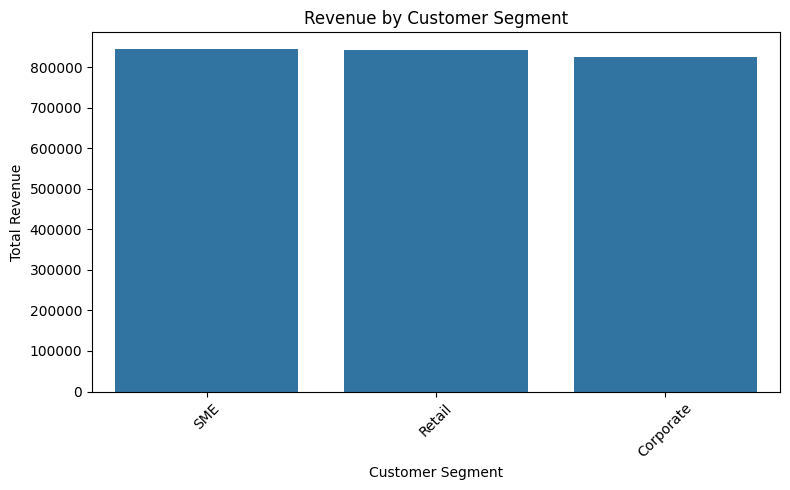

In [12]:

segment_revenue = df.groupby('Customer_Segment')['Revenue'].sum().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=segment_revenue.index, y=segment_revenue.values)
plt.title('Revenue by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Deal size vs revenue

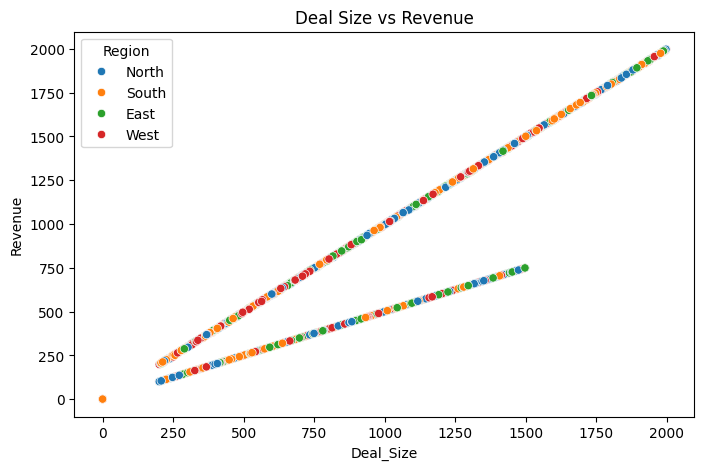

In [13]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="Deal_Size", y="Revenue", hue="Region")
plt.title("Deal Size vs Revenue")
plt.show()


Tahap distribusi

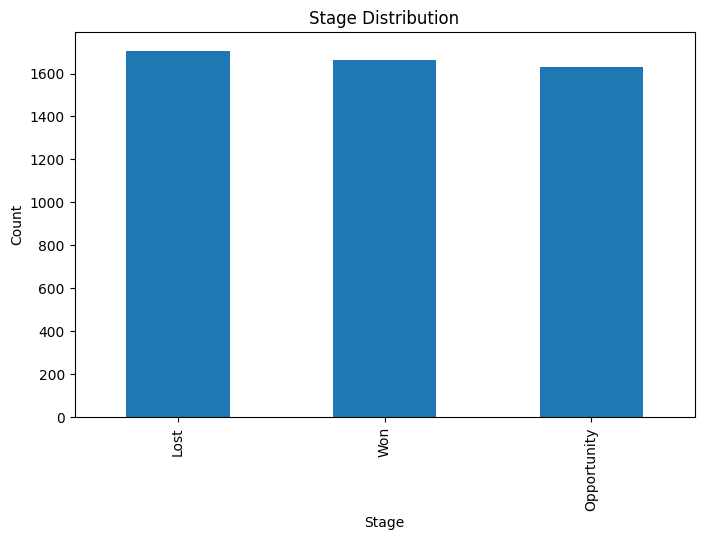

In [14]:
plt.figure(figsize=(8,5))
df["Stage"].value_counts().plot(kind="bar")
plt.title("Stage Distribution")
plt.xlabel("Stage")
plt.ylabel("Count")
plt.show()

Distribusi unit yang terjual

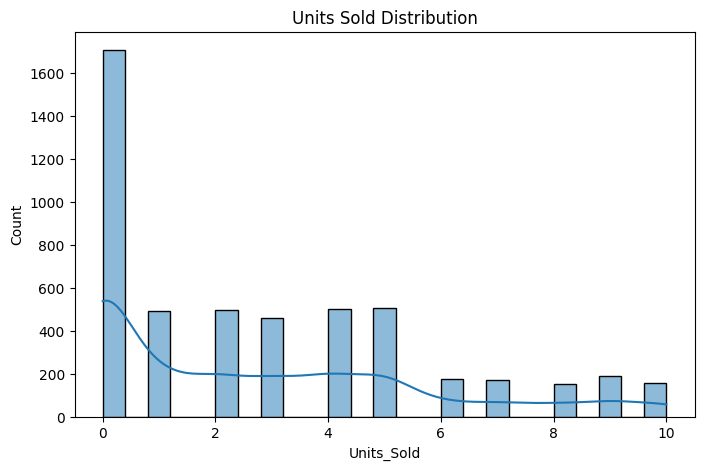

In [15]:
plt.figure(figsize=(8,5))
sns.histplot(df["Units_Sold"], bins=25, kde=True)
plt.title("Units Sold Distribution")
plt.show()

Tren revenue bulanan

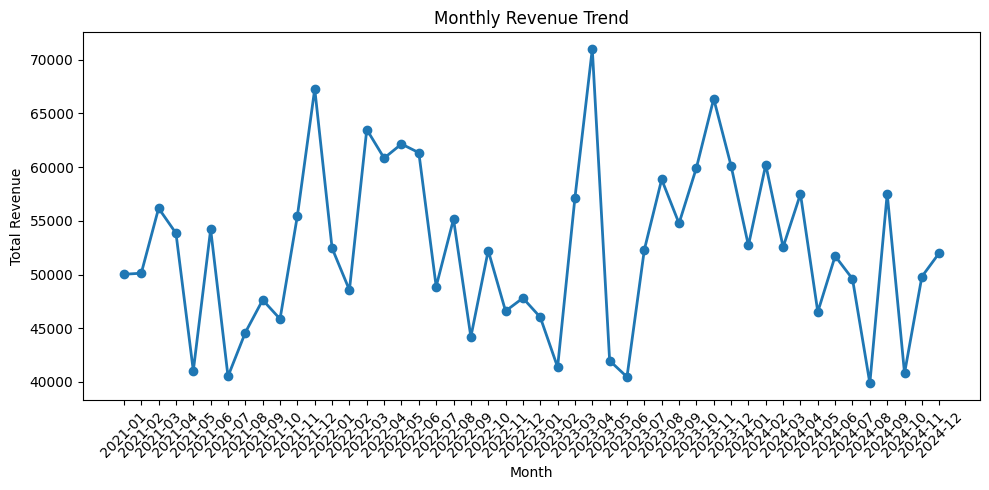

In [16]:
df['Order_Date'] = pd.to_datetime(df['Order_Date'])

# Monthly Revenue
monthly_revenue = df.groupby(df['Order_Date'].dt.to_period('M'))['Revenue'].sum()

# Convert PeriodIndex → string agar bisa diplot
monthly_revenue.index = monthly_revenue.index.astype(str)

# Plot
plt.figure(figsize=(10, 5))
plt.plot(monthly_revenue.index, monthly_revenue.values, marker='o', linewidth=2)
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

BUSSINES INSIGHT

In [17]:
total_rev = df_clean['Revenue'].sum()
conversion = (df_clean['Stage'] == 'Won').mean() * 100
avg_won = df_clean[df_clean['Stage']=='Won']['Revenue'].mean()

top_region = df_clean.groupby('Region')['Revenue'].sum().idxmax()
top_category = df_clean.groupby('Product_Category')['Revenue'].sum().idxmax()
top_team = df_clean.groupby('Team')['Revenue'].sum().idxmax()
top_rep = df_clean.groupby('Sales_Rep')['Revenue'].sum().idxmax()

print("\n=== KEY BUSINESS INSIGHTS ===")
print(f"Total Revenue: ${total_rev:,.2f}")
print(f"Conversion Rate: {conversion:.2f}%")
print(f"Average Won Deal: ${avg_won:,.2f}")
print(f"Best Region: {top_region}")
print(f"Best Product Category: {top_category}")
print(f"Top team: {top_team}")
print(f"Top Sales Rep: {top_rep}")


=== KEY BUSINESS INSIGHTS ===
Total Revenue: $2,511,950.00
Conversion Rate: 33.28%
Average Won Deal: $1,101.89
Best Region: North
Best Product Category: Appliances
Top team: Team C
Top Sales Rep: Priya Sharma


Export data yang sudah dibersihkan

In [23]:
df_clean.to_csv('supermarket_sales_cleaned_final+.csv', index=False)
print("\nCleaned data exported successfully.")


Cleaned data exported successfully.
